In [4]:
import pandas as pd
import numpy as np
import sys
sys.path.append('../')
from data import load_data, load_config

# slowdelta, fastdelta, slowtheta, fasttheta, alpha, beta, gamma, rms, mouseID, lab, sleepstage, epoch
config = load_config()
data_path = config['data_path']
df = load_data(data_path)
df

,slowdelta,fastdelta,slowtheta,fasttheta,alpha,beta,rms,mouseID,lab,sleepstage,epoch
0,0.286260,0.175425,0.207455,0.125388,0.108024,0.058404,0.338769,1.0,1.0,3.0,1.0
1,0.238637,0.121246,0.174037,0.067707,0.070327,0.040197,0.248721,1.0,1.0,3.0,2.0
2,0.121714,0.290182,0.313687,0.087330,0.092042,0.071340,0.228859,1.0,1.0,3.0,3.0
3,0.090216,0.104930,0.454057,0.256769,0.107563,0.061333,0.211976,1.0,1.0,1.0,6.0
4,0.090192,0.104901,0.644949,0.082334,0.065495,0.055760,0.209134,1.0,1.0,1.0,7.0
...,...,...,...,...,...,...,...,...,...,...,...
1958286,0.139606,0.095954,0.214060,0.121142,0.201720,0.156274,0.123541,16.0,5.0,3.0,10794.0
1958287,0.113887,0.122214,0.271802,0.143455,0.170195,0.169966,0.125525,16.0,5.0,3.0,10795.0
1958288,0.096449,0.254481,0.149651,0.123115,0.101740,0.076557,0.097413,16.0,5.0,3.0,10796.0
1958289,0.065317,0.313154,0.243949,0.100223,0.075370,0.135688,0.077541,16.0,5.0,3.0,10797.0


In [2]:
label = 'sleepstage'
features = ['slowdelta', 'fastdelta', 'slowtheta', 'fasttheta', 'alpha', 'beta', 'rms']

X = df[features]
y = df[label]

In [3]:
# how many unique combinations of lab and mouseIDS are there?
number_of_unique_combinations = df.groupby(['lab', 'mouseID']).ngroups
number_of_unique_combinations

150

In [4]:
# show unique ids for each lab
unique_ids = df.groupby('lab')['mouseID'].unique()
unique_ids

lab
1.0    [1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, ...
2.0    [1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, ...
3.0    [1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, ...
4.0    [1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, ...
5.0    [-1.0, 0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0,...
Name: mouseID, dtype: object

In [5]:
# count amount of unique ids for each lab
unique_ids_count = df.groupby('lab')['mouseID'].nunique()
unique_ids_count

lab
1.0    10
2.0    34
3.0    55
4.0    33
5.0    18
Name: mouseID, dtype: int64

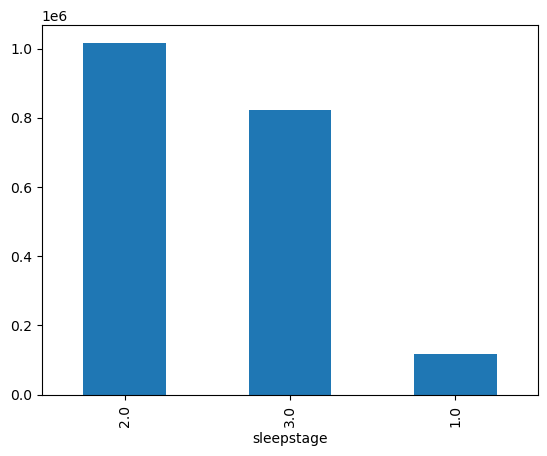

In [6]:
# plot the number of sleepstages for each mouse
import matplotlib.pyplot as plt
df['sleepstage'].value_counts().plot(kind='bar')
plt.show()

In [7]:
# unique id, L{lab},M{mouseID}
df['unique_id'] = df['lab'].astype(str) + '_' + df['mouseID'].astype(str)
df['unique_id'] = df['unique_id'].astype('category').cat.codes + 1
df = df.sort_values('unique_id')
df

,slowdelta,fastdelta,slowtheta,fasttheta,alpha,beta,rms,mouseID,lab,sleepstage,epoch,unique_id
0,0.286260,0.175425,0.207455,0.125388,0.108024,0.058404,0.338769,1.0,1.0,3.0,1.0,1
41184,0.090378,0.370615,0.240097,0.081554,0.140792,0.067703,0.414360,1.0,1.0,3.0,43255.0,1
41185,0.411872,0.127013,0.172795,0.062764,0.082301,0.047648,0.406009,1.0,1.0,3.0,43256.0,1
41186,0.260672,0.200171,0.164967,0.081898,0.154101,0.060435,0.418746,1.0,1.0,3.0,43257.0,1
41187,0.162809,0.091261,0.266165,0.132450,0.177477,0.041848,0.412606,1.0,1.0,3.0,43258.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
1879140,0.337924,0.231237,0.068860,0.054589,0.092746,0.072120,0.109166,9.0,5.0,3.0,7178.0,150
1879139,0.307003,0.264140,0.142889,0.045048,0.051583,0.073142,0.663739,9.0,5.0,3.0,7177.0,150
1879138,0.404338,0.274106,0.076717,0.036097,0.089673,0.053889,0.103816,9.0,5.0,3.0,7176.0,150
1879146,0.164438,0.372611,0.219474,0.050206,0.135191,0.061387,0.105354,9.0,5.0,3.0,7184.0,150


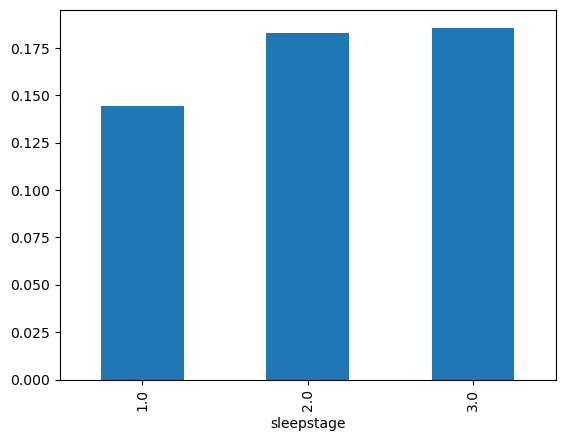

In [8]:
# plot alpha for each sleepstage for mice 1
df[df['unique_id'] == 47].groupby('sleepstage')['alpha'].mean().plot(kind='bar')
plt.show()

In [9]:
# Calculate mean alpha values for each sleep stage for each unique_id
mean_alpha_by_id = df.groupby(['unique_id', 'sleepstage'])['alpha'].mean().unstack()

# Extract mean alpha values for sleep stage 2
mean_alpha_stage2 = mean_alpha_by_id[2]

# Calculate the maximum mean alpha value for each unique_id across all sleep stages
max_mean_alpha_by_id = mean_alpha_by_id.max(axis=1)

# Count the number of mice in sleep stage 2 where the mean alpha is the highest across its own sleep stages
count_highest_alpha_stage2 = sum(mean_alpha_stage2 >= max_mean_alpha_by_id)

# Display the count
print("Number of mice with the highest mean alpha in sleep stage 2:", count_highest_alpha_stage2)

Number of mice with the highest mean alpha in sleep stage 2: 41


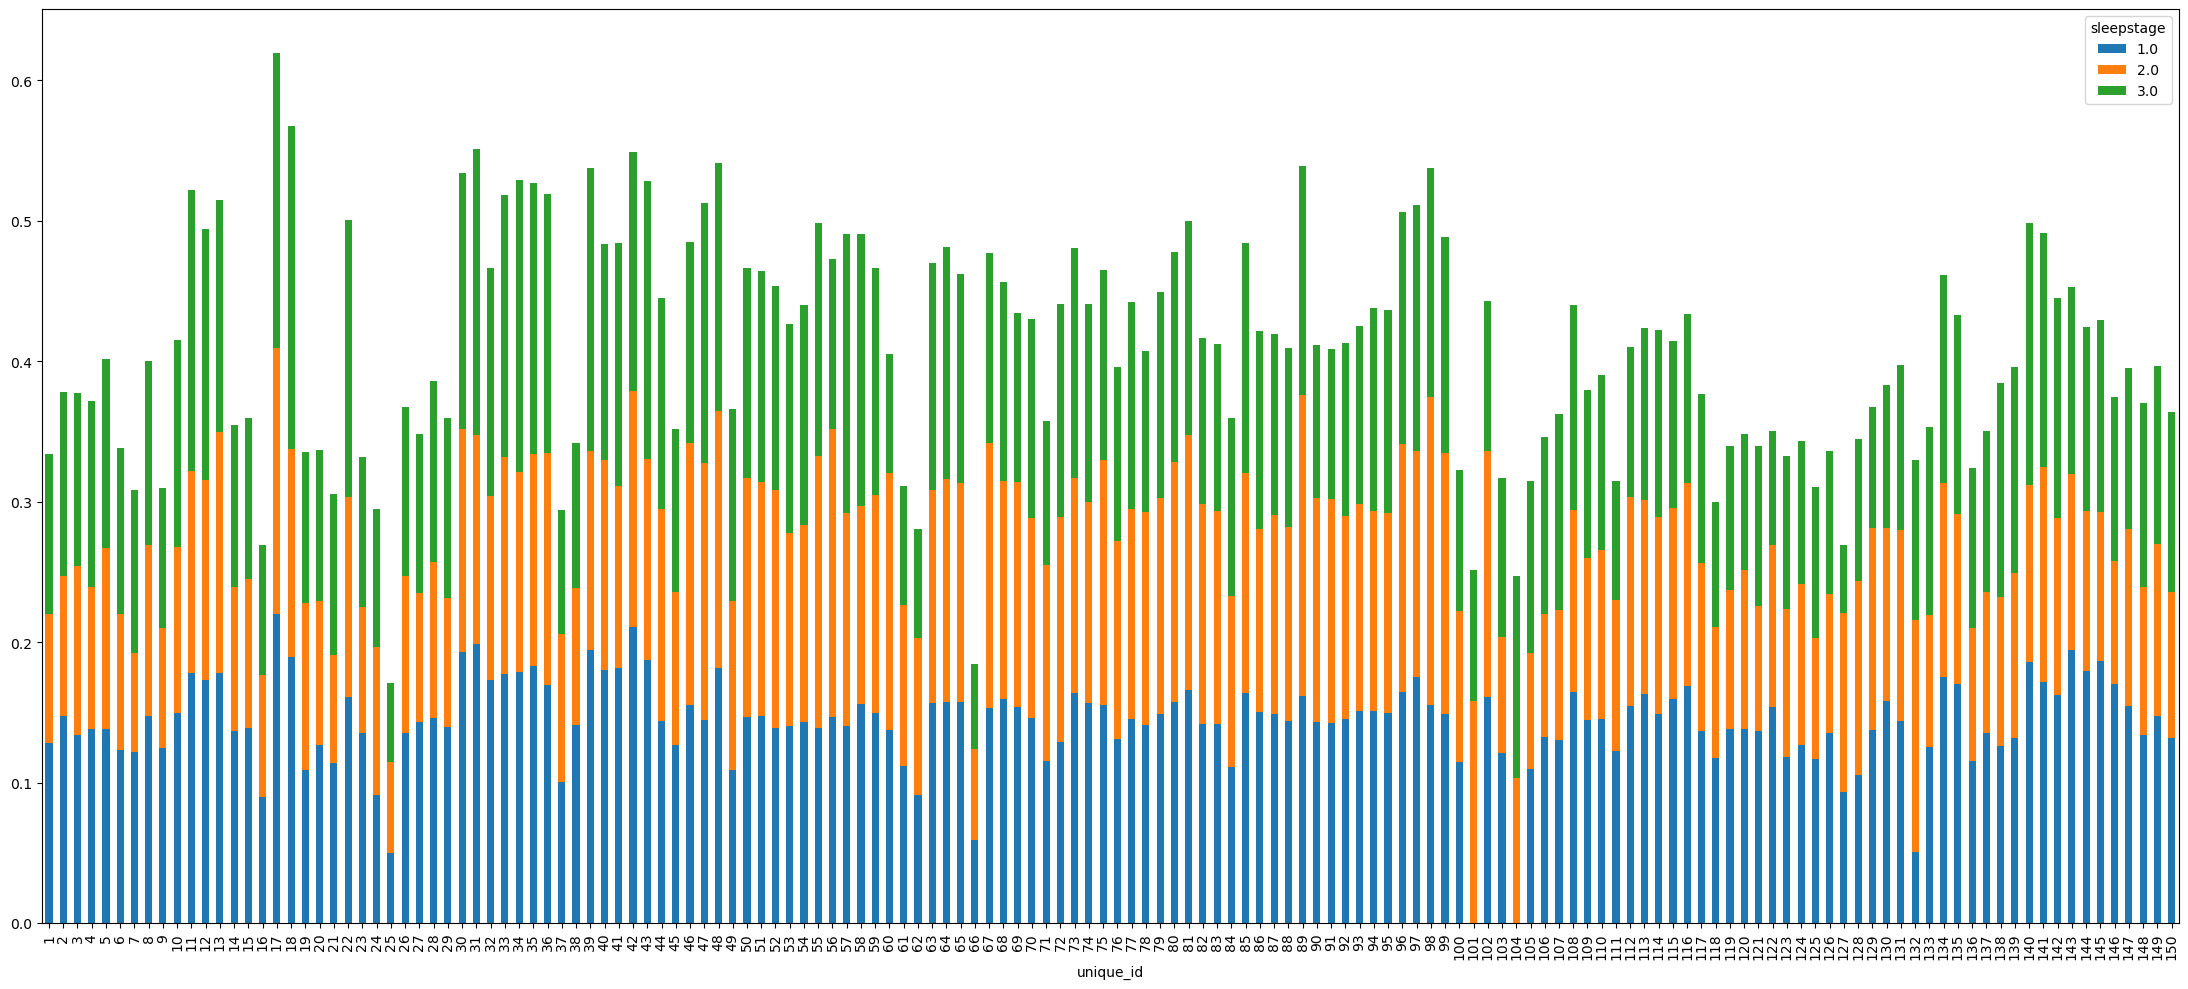

In [10]:
# plot mean_alpha_by_id, so there are 150 bars for each sleepstage
mean_alpha_by_id = df.groupby(['unique_id', 'sleepstage'])['alpha'].mean().unstack().fillna(0)
mean_alpha_by_id.plot(kind='bar', stacked=True)
# make plot wider
plt.gcf().set_size_inches(22, 10)
plt.tight_layout()
plt.show()

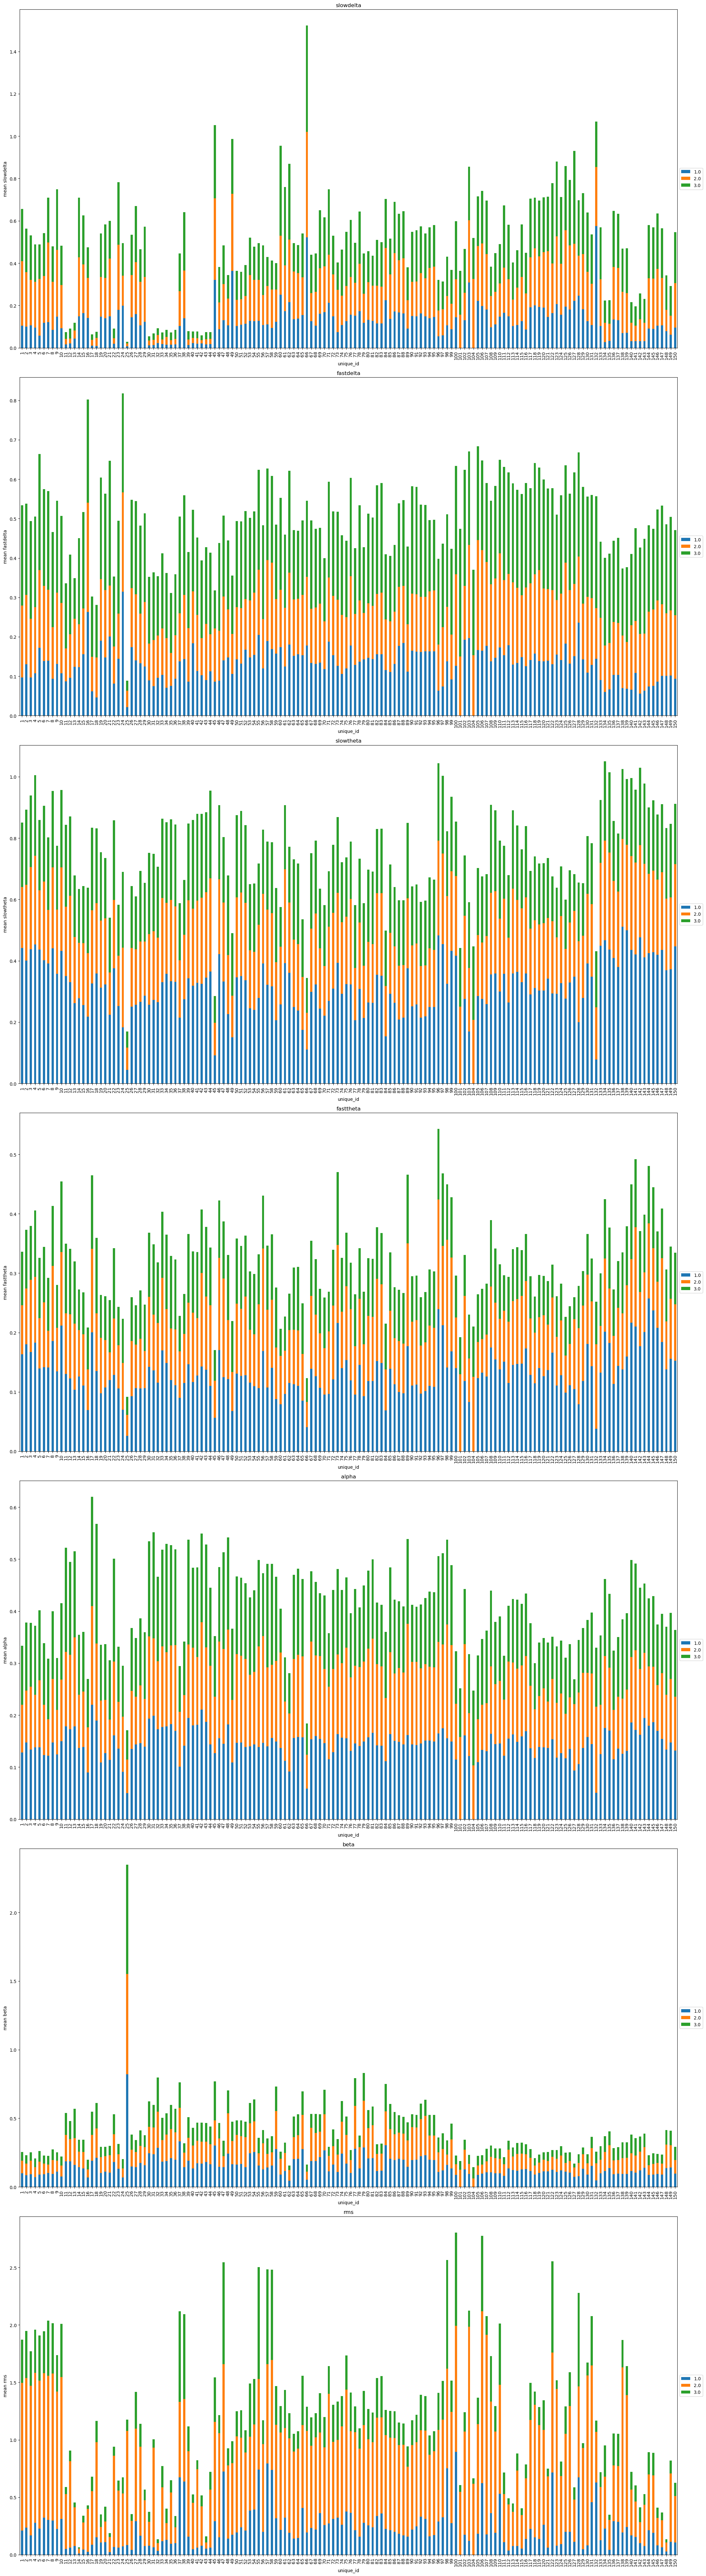

In [11]:
# do the same for the other features
features = ['slowdelta', 'fastdelta', 'slowtheta', 'fasttheta', 'alpha', 'beta', 'rms']

# subplot for each feature
fig, ax = plt.subplots(7, 1, figsize=(22, 80))

for i, feature in enumerate(features):
    mean_feature_by_id = df.groupby(['unique_id', 'sleepstage'])[feature].mean().unstack().fillna(0)
    mean_feature_by_id.plot(kind='bar', stacked=True, ax=ax[i])
    ax[i].set_title(feature)
    ax[i].set_ylabel('mean ' + feature)
    ax[i].set_xlabel('unique_id')
    ax[i].legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.tight_layout()
plt.show()

In [12]:
# what lab is these mice from?
df[df['unique_id'].isin(range(45, 100))]['lab'].value_counts()

lab
3.0    885404
Name: count, dtype: int64